In [10]:
# importing libraries 

import pandas as pd
import csv
import re
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import openpyxl

In [51]:
# input data

df = pd.read_csv('Data/Week5/input.csv')
df

,Transaction Code,Value,Customer Code,Online or In-Person,Transaction Date
0,DTB-716-679-576,1448,100001,2,20/03/2023 00:00:00
1,DS-795-814-303,7839,100001,2,15/11/2023 00:00:00
2,DSB-807-592-406,5520,100005,1,14/07/2023 00:00:00
3,DS-367-545-264,7957,100007,2,18/08/2023 00:00:00
4,DSB-474-374-857,5375,100000,2,26/08/2023 00:00:00
...,...,...,...,...,...
360,DTB-116-439-102,6708,100001,1,29/01/2023 00:00:00
361,DS-849-981-514,8500,100000,2,29/10/2023 00:00:00
362,DS-726-686-279,9455,100006,2,10/08/2023 00:00:00
363,DS-551-937-380,475,100002,1,11/10/2023 00:00:00


In [52]:
# extracting bank name 

def extract_bank_code(transaction_code):
    bank_code = re.search(r'([A-Z]+)-', transaction_code)
    if bank_code:
        return bank_code.group(1)
    else:
        return None

df['Bank code'] = df['Transaction Code'].apply(extract_bank_code)
df

,Transaction Code,Value,Customer Code,Online or In-Person,Transaction Date,Bank code
0,DTB-716-679-576,1448,100001,2,20/03/2023 00:00:00,DTB
1,DS-795-814-303,7839,100001,2,15/11/2023 00:00:00,DS
2,DSB-807-592-406,5520,100005,1,14/07/2023 00:00:00,DSB
3,DS-367-545-264,7957,100007,2,18/08/2023 00:00:00,DS
4,DSB-474-374-857,5375,100000,2,26/08/2023 00:00:00,DSB
...,...,...,...,...,...,...
360,DTB-116-439-102,6708,100001,1,29/01/2023 00:00:00,DTB
361,DS-849-981-514,8500,100000,2,29/10/2023 00:00:00,DS
362,DS-726-686-279,9455,100006,2,10/08/2023 00:00:00,DS
363,DS-551-937-380,475,100002,1,11/10/2023 00:00:00,DS


In [53]:
# Change transaction date to the just be the month of the transaction

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format='%d/%m/%Y %H:%M:%S') 
df['Transaction Date'] = pd.DatetimeIndex(df['Transaction Date']).month_name()
df

,Transaction Code,Value,Customer Code,Online or In-Person,Transaction Date,Bank code
0,DTB-716-679-576,1448,100001,2,March,DTB
1,DS-795-814-303,7839,100001,2,November,DS
2,DSB-807-592-406,5520,100005,1,July,DSB
3,DS-367-545-264,7957,100007,2,August,DS
4,DSB-474-374-857,5375,100000,2,August,DSB
...,...,...,...,...,...,...
360,DTB-116-439-102,6708,100001,1,January,DTB
361,DS-849-981-514,8500,100000,2,October,DS
362,DS-726-686-279,9455,100006,2,August,DS
363,DS-551-937-380,475,100002,1,October,DS


In [55]:
# Group the DataFrame by 'Bank code' and 'Transaction Date' and calculate the sum of transaction values
grouped_df = df.groupby(['Bank code', 'Transaction Date'])['Value'].sum()


Bank code  Transaction Date
DS         April                40785
           August              102237
           December             33952
           February             31204
           January              50207
           July                 55002
           June                 55182
           March                36799
           May                  38715
           November             96868
           October              70993
           September            41996
DSB        April                30317
           August               38167
           December             20785
           February             28622
           January              45036
           July                 71515
           June                 64642
           March                78480
           May                  45000
           November             42639
           October              41707
           September            23579
DTB        April                42360
           August     

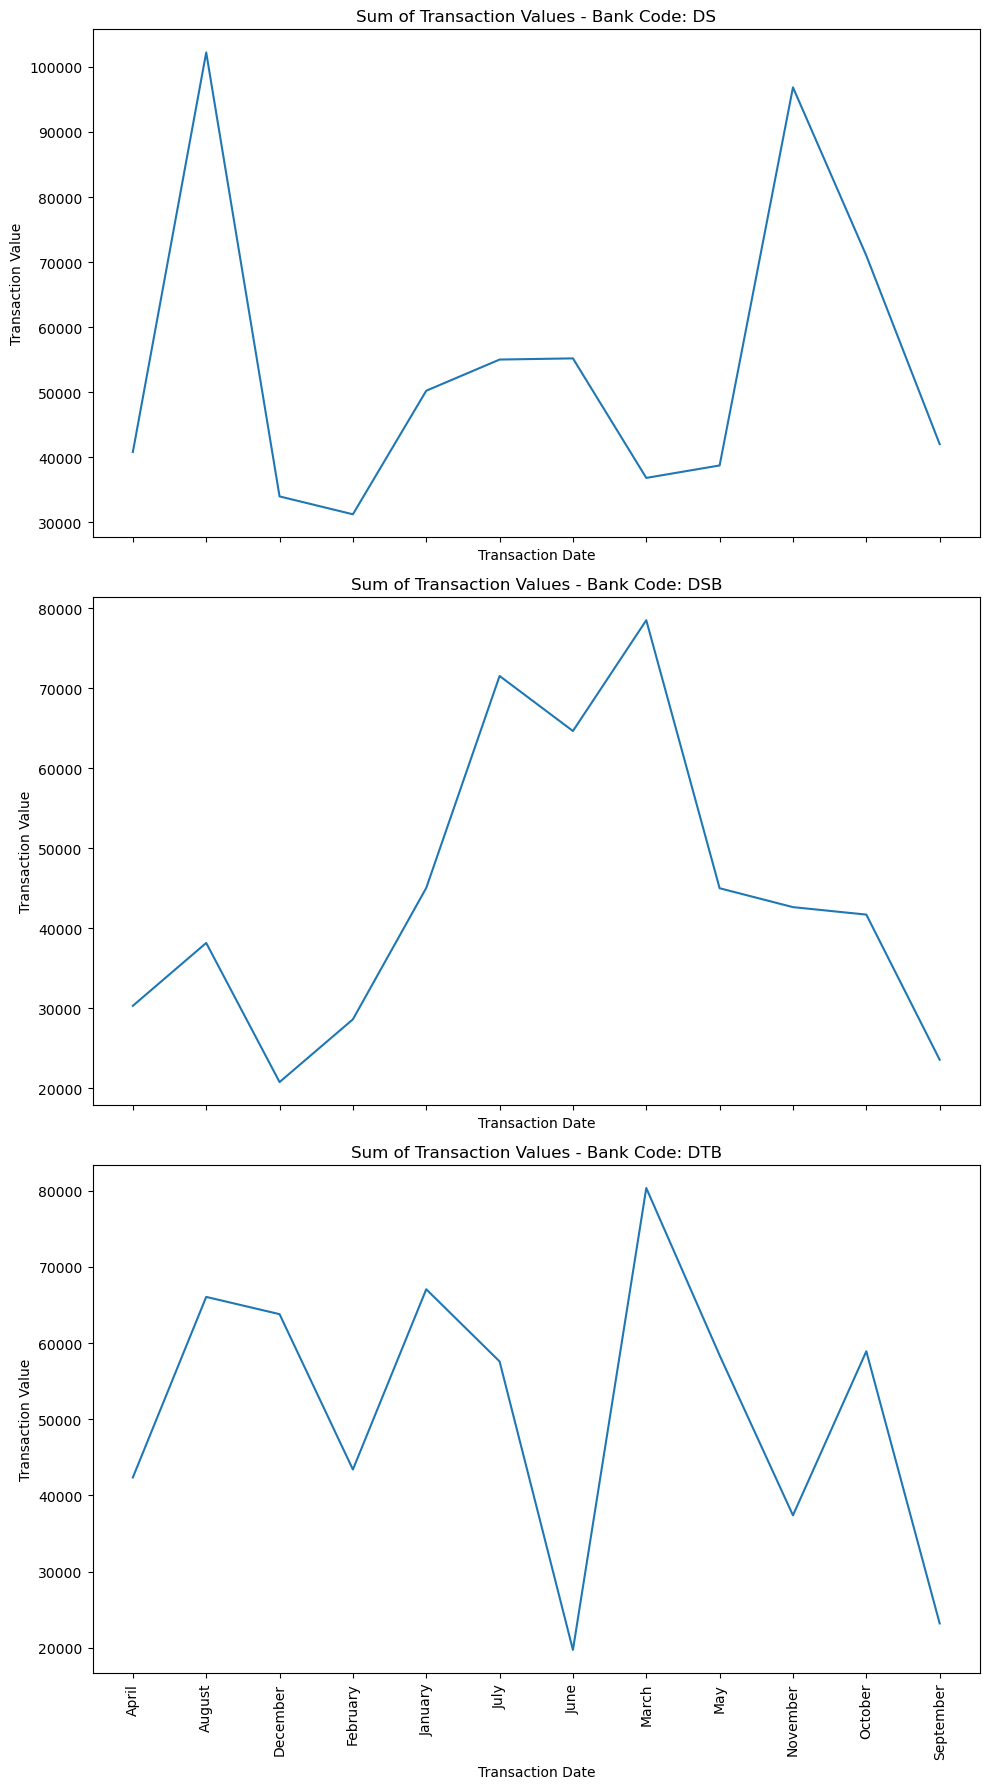

In [57]:
import numpy as np

# Extract unique bank codes and transaction dates
bank_codes = grouped_df.index.get_level_values('Bank code').unique()
transaction_dates = grouped_df.index.get_level_values('Transaction Date').unique()

# Create a grid of subplots based on the number of bank codes
fig, axs = plt.subplots(len(bank_codes), figsize=(10, 6 * len(bank_codes)), sharex=True)

# Iterate over bank codes and plot line chart for each
for i, bank_code in enumerate(bank_codes):
    bank_df = grouped_df.loc[bank_code]
    values = bank_df.values
    
    # Create x-axis positions for each transaction date
    x = np.arange(len(transaction_dates))
    
    # Plot the line chart
    axs[i].plot(x, values)
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(transaction_dates, rotation=90)
    axs[i].set_xlabel('Transaction Date')
    axs[i].set_ylabel('Transaction Value')
    axs[i].set_title(f'Sum of Transaction Values - Bank Code: {bank_code}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [69]:
# RANKing top 3

rank = df.groupby('Bank code')['Value'].sum().reset_index()  # Calculate the sum of 'Value' for each 'Bank code'
rank = rank.sort_values('Value', ascending=False)  # Sort the DataFrame by the sum of 'Value'
rank = rank.groupby('Bank code').head(3)  # Retrieve the top 3 rows for each 'Bank code'
rank 


,Bank code,Value
0,DS,653940
2,DTB,618238
1,DSB,530489


In [75]:
# RANKing top 3

rank_mean = df.groupby('Bank code')['Value'].mean().reset_index()  # Calculate the sum of 'Value' for each 'Bank code'
rank_mean = rank_mean.sort_values('Value', ascending=False)  # Sort the DataFrame by the sum of 'Value'
rank_mean = rank_mean.groupby('Bank code').head(3)  # Retrieve the top 3 rows for each 'Bank code'
rank_mean.rename(columns={"Value": "Average Transaction Value"})
rank_mean

,Bank code,Value
1,DSB,5200.872549
0,DS,5108.906250
2,DTB,4579.540741
